<a href="https://colab.research.google.com/github/NicolasPham/DataAnalystProjects/blob/main/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal of the Project:
The purpose of this project is to conduct a Customer Segmentation Analysis for an Automobile bike Company. Customer segmentation is performed by developing a RFM Model. RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions.
In this analysis the customer segment was divided into 11 groups. The analysis will help in determining which customers segments should be targeted in order to **enhance sales revenue** for the company. A Sales Dashboard for Customer Segmentation is developed using **Tableau** and the data quality assessment and analysis is done using **Python**.

---
## I. Data Quality Assessment and Data Cleaning
The first step towards generating useful insights from the data was the data prepartion, quality assessment and data cleaning step. After the cleaning process exploratory data analysis on the dataset and identification customer purchasing behaviours to generate insights can be performed.

#### Conclusion:
- 1 Irrelevent column was present and such columns were dropped from the dataset.
- There were 5 columns were Missing values were present. For such columns based on the volumne of the missing values either the records were dropped or appropiate values were imputed at places of missing values
- For gender column there was no standardisation of data. Based on the values available the column data was standardised to remove data inconsistency.
- The Date of Birth column was transformed to create a new feature column 'Age' and 'Age Group' to check for discripency of age distribution. An outlier was observed and the record was removed.
- Checked whether there are duplicate records present in the dataset. In this dataset there were no duplicate records.

## I. Exploratory Data Analysis on Customer Segments
After the data cleaning process, exploratory analysis on the dataset is performed and the following insights are obtained :
- Most bike puechases are done by Feamale over the last 3 years. Approximately **52%** of the bike purchases are done by Female compared to **48%** of the purchases being done by Male.
- Most New customers are from the **Manufacturing and Financial Services** sector (approx 20% of the New Customers).
- The lowest number of customers are from the **Agriculture and Telecom** sector approx 3%.
- Across all age categories the largest number of customers are from **'Mass Customer'** Segment
- **New South Wales** has the largest number of people who donot own a car.
- In **Victoria** the proportion is quite even.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel(r'/content/drive/MyDrive/Dataset/customerSegmentation.xlsx', sheet_name='NewCustomerList')

In [3]:
df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.81,1.0125,1.265625,1.075781,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.75,0.7500,0.937500,0.796875,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.71,0.7100,0.710000,0.710000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.50,0.6250,0.625000,0.625000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.99,0.9900,1.237500,1.237500,4,4,1.703125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

#### Total Records

In [5]:
print('Total records rows: ' + str(df.shape[0]))
print('Total records columns: ' + str(df.shape[1]))

Total records rows: 1000
Total records columns: 23


In [6]:
# Drop irrelevant columns
columnsToDrop = ['Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20']
df.drop(columnsToDrop, axis = 1, inplace = True)

#### Missing values check

In [7]:
# Total of missing values
df.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [8]:
# Percentage of missing values
df.isnull().mean()*100

first_name                              0.0
last_name                               2.9
gender                                  0.0
past_3_years_bike_related_purchases     0.0
DOB                                     1.7
job_title                              10.6
job_industry_category                  16.5
wealth_segment                          0.0
deceased_indicator                      0.0
owns_car                                0.0
tenure                                  0.0
address                                 0.0
postcode                                0.0
state                                   0.0
country                                 0.0
property_valuation                      0.0
Rank                                    0.0
Value                                   0.0
dtype: float64

In [9]:
# Since all customers have first name, they are identifiable, fill "NaN" last name with None
df['last_name'].fillna('None', axis = 0, inplace = True)
df['last_name'].isnull().sum()

0

In [10]:
# Missing values in DOB column is less than 5%, we can drop then
index_drop = df[df['DOB'].isnull()].index
index_drop

Int64Index([ 59, 226, 324, 358, 360, 374, 434, 439, 574, 598, 664, 751, 775,
            835, 883, 904, 984],
           dtype='int64')

In [11]:
df.drop(index = index_drop, axis = 0, inplace = True)
df.DOB.isnull().sum()

0

#### Creating Age Column for checking further descripency in data

In [12]:
from datetime import date

def age(born):
  today = date.today()
  return today.year - born.year - ((today.month, today.day) < (born.month, born.day))


df['Age'] = df['DOB'].apply(age)

In [13]:
df['Age'].describe()

count    983.000000
mean      52.391658
std       17.058490
min       22.000000
25%       40.500000
50%       51.000000
75%       66.000000
max       85.000000
Name: Age, dtype: float64

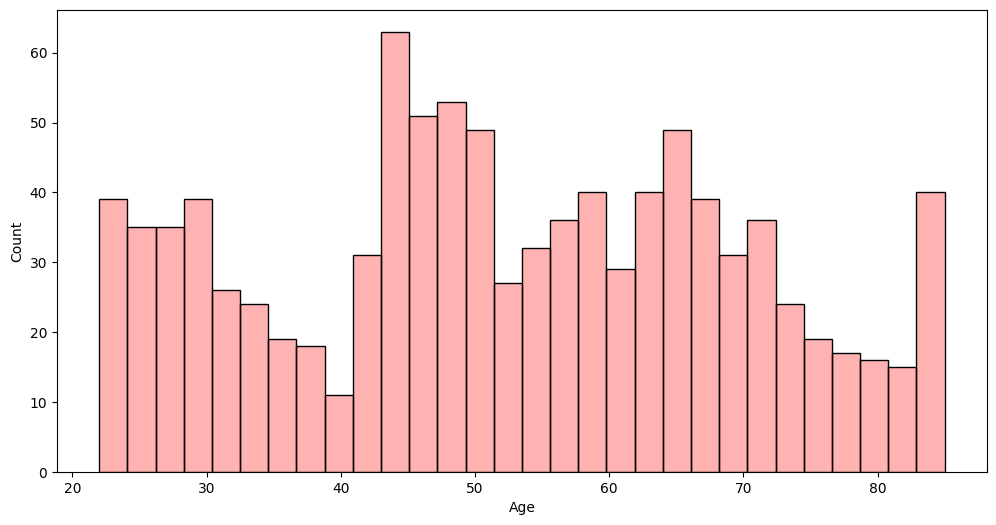

In [14]:
# Vizualize Age Distribution
plt.figure(figsize=(12,6))
sns.histplot(data = df, x = 'Age', bins=30, color='red', alpha=0.3)
plt.show()

#### Create Age GROUP

In [15]:
import math
df['AgeGroup'] = df['Age'].apply(lambda x: math.floor(x/10)*10)

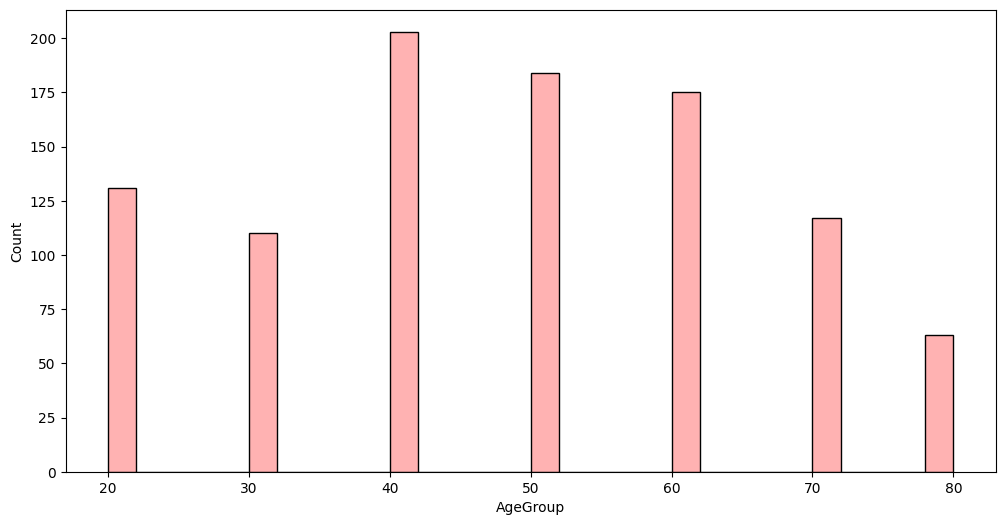

In [16]:
plt.figure(figsize=(12,6))
sns.histplot(data = df, x = 'AgeGroup', bins=30, color='red', alpha=0.3)
plt.show()

#### Job title and Job Industry Category
- Since the missing values for this column is ~11%, we cannot drop null value. We replace with 'missing'
- Do similar to Job Industry Category

In [17]:
df['job_title'].fillna('Missing', axis=0, inplace = True)
df['job_industry_category'].fillna('Missing', axis = 0, inplace = True)
df['job_title'].isnull().sum()
df['job_industry_category'].isnull().sum()

0

In [18]:
# Print total records after removing missing values
print('Total records: ' + str(df.shape[0]))


Total records: 983


---
### 3. Inconsistency Check in Data (outliers)
We will check whether there is inconsistent data / typo error data is present in the categorical columns.  
The columns to be checked are 'gender', 'wealth_segment' ,'deceased_indicator', 'owns_car'



In [19]:
df['gender'].value_counts()

Female    513
Male      470
Name: gender, dtype: int64

In [20]:
df['wealth_segment'].value_counts()

Mass Customer        499
High Net Worth       249
Affluent Customer    235
Name: wealth_segment, dtype: int64

In [21]:
df['deceased_indicator'].value_counts()
# Only 1 value in this column, we do not need to analyze it

N    983
Name: deceased_indicator, dtype: int64

In [22]:
df['owns_car'].value_counts()

No     497
Yes    486
Name: owns_car, dtype: int64

#### Tenure column

In [23]:
df['tenure'].describe()

count    983.000000
mean      11.459817
std        5.006123
min        1.000000
25%        8.000000
50%       11.000000
75%       15.000000
max       22.000000
Name: tenure, dtype: float64

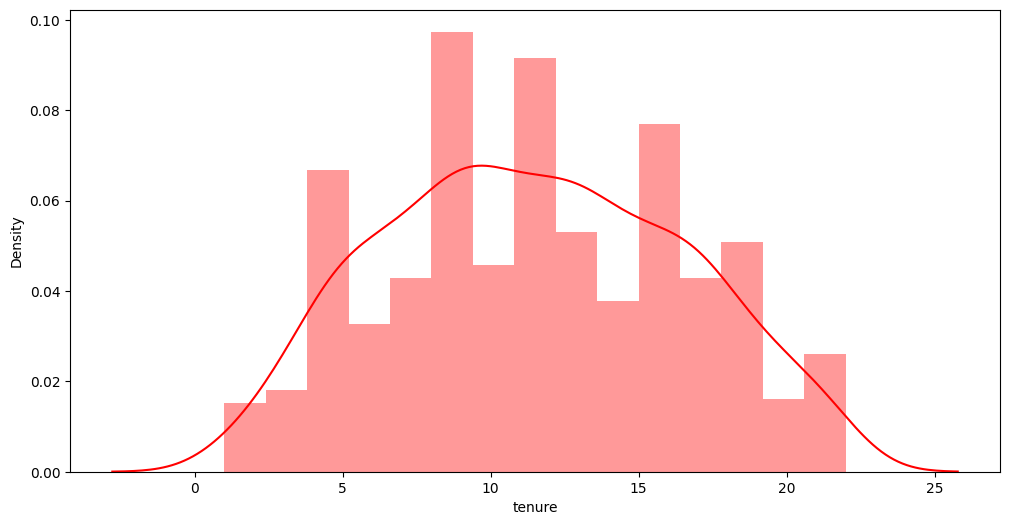

In [24]:
plt.figure(figsize=(12,6))
sns.distplot(df['tenure'], color='red')
plt.show()

---
#### 4. Duplication Check
- We need to ensure that there is no duplication of records in the dataset. This may lead to error in data analysis due to poor data quality. If there are duplicate rows of data then we need to drop such records.

In [25]:
df.duplicated().sum()

0

---
### II. Analyze Data
#### 1. By Gender

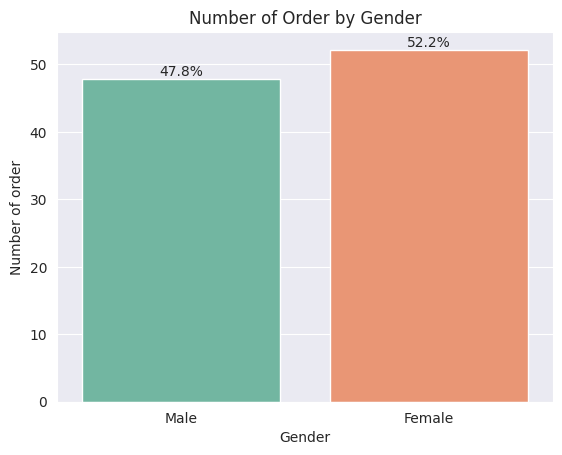

In [79]:
sns.set_style('darkgrid')
ax = sns.countplot(data = df, x ='gender', hue='gender', palette='Set2', stat='percent')
for container in ax.containers:
  ax.bar_label(container, fmt= lambda x: f'{x:.1f}%')
plt.ylabel('Number of order')
plt.xlabel('Gender')
plt.title('Number of Order by Gender')
plt.show()

#### 2. By Category

In [82]:
df_cat = df['job_industry_category'].value_counts()

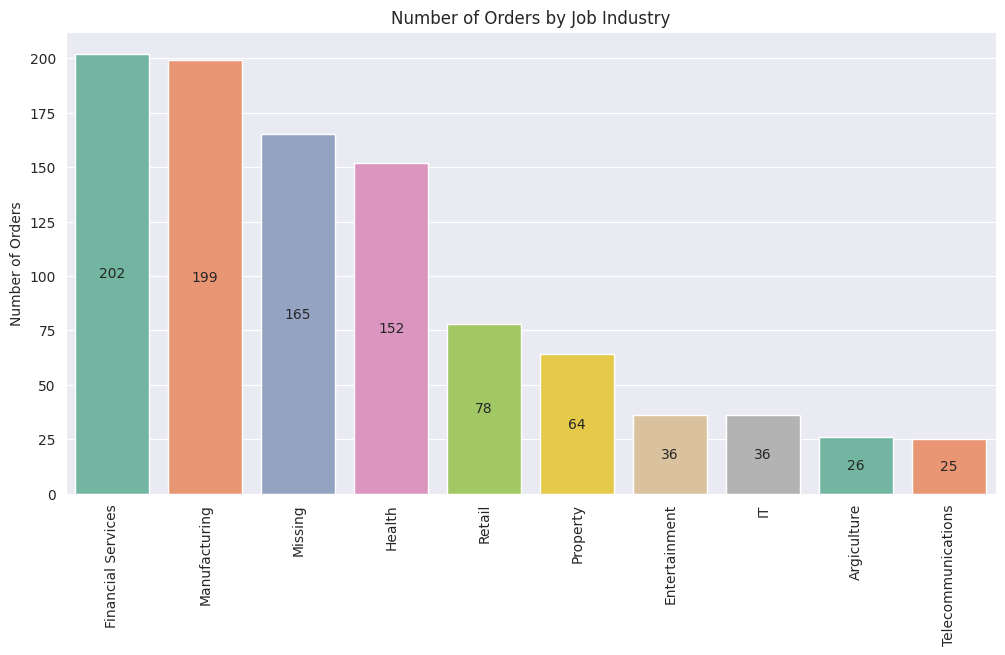

In [89]:
plt.figure(figsize=(12,6))
ax = sns.barplot(df_cat, palette='Set2')
for container in ax.containers:
  ax.bar_label(container, label_type='center')
plt.xticks(rotation='vertical')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Job Industry')
plt.show()

#### 3. By Weath Segment

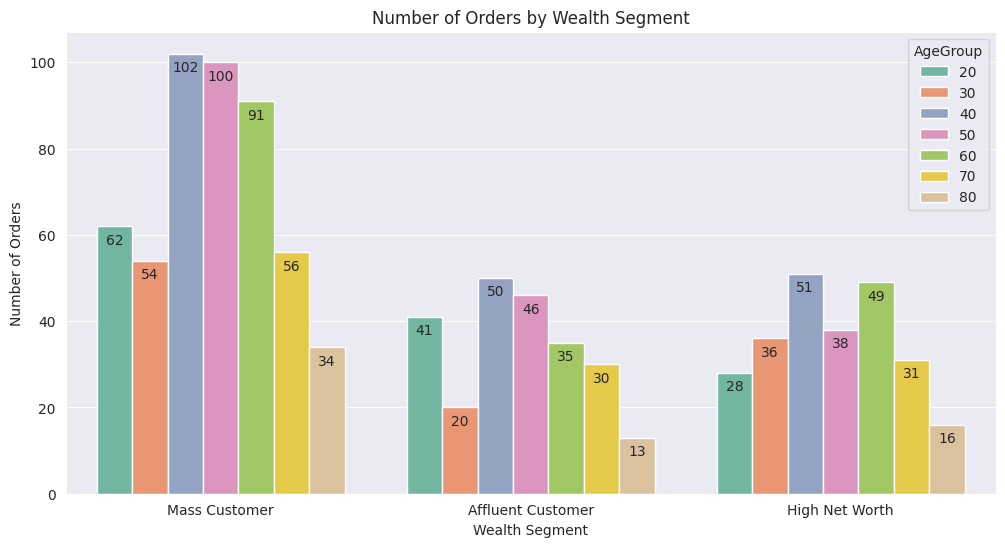

In [101]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df, x='wealth_segment', hue = 'AgeGroup', palette='Set2')
for container in ax.containers:
  ax.bar_label(container, padding=-15)
plt.xlabel('Wealth Segment')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Wealth Segment')
plt.show()

#### 4. Car Owned by States

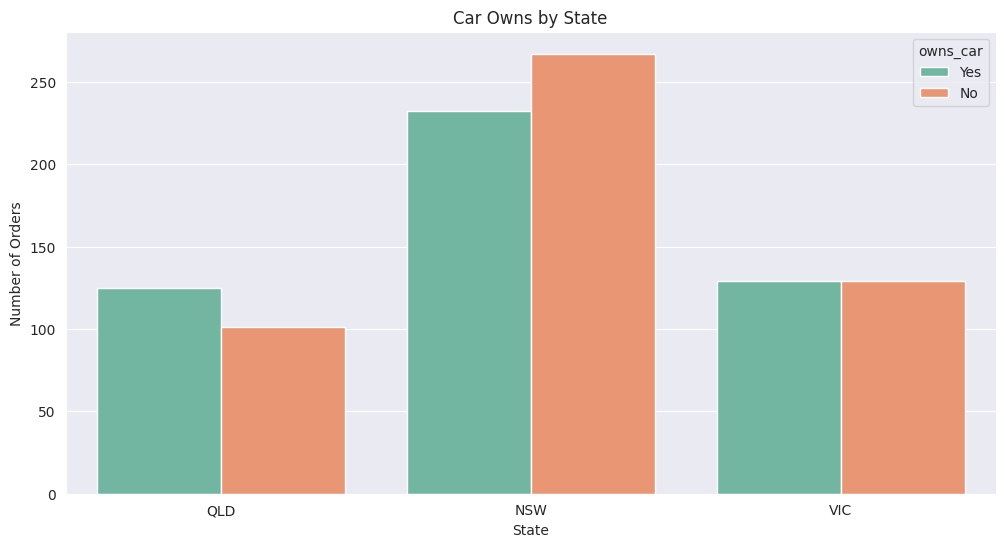

In [105]:
plt.figure(figsize=(12,6))
ax = sns.countplot(df, x='state', hue='owns_car', palette='Set2')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Car Owns by State')
plt.show()

In [90]:
df.head(2)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Age,AgeGroup
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.71875,66,60
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.71875,53,50


In [106]:
df.Rank.describe()

count     983.000000
mean      497.745677
std       289.186799
min         1.000000
25%       248.500000
50%       500.000000
75%       748.000000
max      1000.000000
Name: Rank, dtype: float64